In [2]:
#import libraires pandas for operation dataframes, 
#numpy for numerical operation, matplotlib for visualization, inline feature allow the visulation to appear in the same window 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
%matplotlib inline

In [3]:
#Open training data in train dataframe
train = pd.read_csv('D:\\Swapnil\\CSUN\\Courses\\Spring 2018\\Comp680\\Project\\House-Prices-Data-master\\House-Prices-Data-master\data\\train.csv')

In [4]:
#Open test data in test dataframe
test = pd.read_csv('D:\\Swapnil\\CSUN\\Courses\\Spring 2018\\Comp680\\Project\\House-Prices-Data-master\\House-Prices-Data-master\data\\test.csv')

In [5]:
#Apply the log function on SalePrice to reduce data skew
target = np.log(train['SalePrice'])

In [6]:
#Remove outliers
train = train[train['GarageArea'] < 1200]

In [7]:
#Converting categorical variable into numerical variable
train['enc_street'] = pd.get_dummies(train['Street'], drop_first=True)
test['enc_street'] = pd.get_dummies(train['Street'], drop_first=True)

In [8]:
#Converting Categorial variable SaleCondition into numerical variable
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

In [9]:
#Add the average value inplace of missing values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [11]:
#Remove the SalePrice from dataset and assigned it to variable to predict. Remove SalePrice and ID from prepared dataset
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [12]:
#import library from sklearn to break the data into train and test data. 33% of the data is is test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)    

In [13]:
#import linear regression model from sklearn
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [14]:
#Train the model using train data of features and dependent variable
model = lr.fit(X_train, y_train)

In [15]:
#Check th accuracy of model 
model.score(X_test, y_test)

0.8882477709262668

In [16]:
#Using the test features predict the value of SalePrice
predictions = model.predict(X_test)

In [17]:
#Import mean_squred_error function from sklearn
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01784179451956573


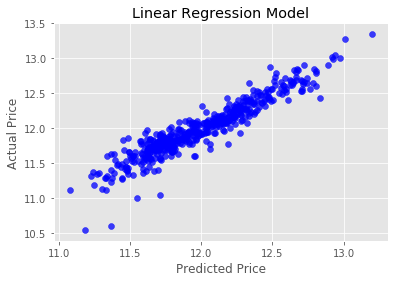

In [18]:
#Show the predicted price and actual prie on scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=0.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()